In [1]:
import pandas as pd 
import json
import numpy as np
from sklearn.metrics.pairwise import haversine_distances
from math import radians
import networkx as nx
import matplotlib.pyplot as plt
from random import randrange
from rtree import index
from math import sqrt

poi = pd.read_csv('/Users/a080528/Downloads/planet_osm_point_202304102229.csv')
edges = pd.read_csv('/Users/a080528/Desktop/Purdue/Courses/CS_541/planet_osm_line_202304132305.csv')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
edges.head()

,id,name,highway,geom
0,5335155,Central Drive,construction,"LINESTRING (-86.9103747 40.4268164, -86.910472..."
1,1053683289,NaN,construction,"LINESTRING (-86.9110932 40.4283317, -86.911075..."
2,932656687,NaN,construction,"LINESTRING (-86.9120055 40.4279773, -86.912000..."
3,722216758,NaN,construction,"LINESTRING (-86.9104953 40.4278651, -86.910489..."
4,1108829574,NaN,construction,"LINESTRING (-86.9102158 40.4276132, -86.910238..."


In [4]:
index = 0
df = pd.DataFrame()
rid = []
name = []
highway = []
node_k = []
node_v = []
wid = []
distance = []

nh1 = []
nh2 = []
et1 = []
et2 = []

for i in range(len(edges)):
    line_point = edges.geom[i][12:-1].split(', ')
    for n in range(len(line_point)-1):
        
        n1 = line_point[n]
        n2 = line_point[n+1]
        
        x, y = np.float64(n1.split(' ')[0]), np.float64(n1.split(' ')[1])
        nh1.append(x)
        et1.append(y)
        k = [x, y]

        x, y = np.float64(n2.split(' ')[0]), np.float64(n2.split(' ')[1])
        nh2.append(x)
        et2.append(y)
        v = [x, y]
        
        dk = [radians(_) for _ in k]
        dv = [radians(_) for _ in v]
        
        rid.append(edges.id[i])
        name.append(edges.name[i])
        highway.append(edges.highway[i])
        node_k.append(k)
        node_v.append(v)
        wid.append(index)
        distance.append((haversine_distances([dk, dv])* 6371000/1600)[0, 1])
        index += 1
'''
n1 = []
n2 = []
e1 = []
e2 = []
for i in range(len(node_k)):
    n1.append(node_k[i][0])
    n2.append(node_v[i][0])
    e1.append(node_k[i][1])
    e2.append(node_v[i][1])
'''



'\nn1 = []\nn2 = []\ne1 = []\ne2 = []\nfor i in range(len(node_k)):\n    n1.append(node_k[i][0])\n    n2.append(node_v[i][0])\n    e1.append(node_k[i][1])\n    e2.append(node_v[i][1])\n'

In [5]:
clean_edge = pd.DataFrame(list(zip(rid, wid, name, highway, node_k, node_v, distance)), columns = ['rid', 'wid', 'name', 'highway', 'node_k', 'node_v', 'distance'])
clean_edge.head()

,rid,wid,name,highway,node_k,node_v,distance
0,5335155,0,Central Drive,construction,"[-86.9103747, 40.4268164]","[-86.9104724, 40.4268159]",0.006790
1,5335155,1,Central Drive,construction,"[-86.9104724, 40.4268159]","[-86.9105569, 40.4268146]",0.005872
2,5335155,2,Central Drive,construction,"[-86.9105569, 40.4268146]","[-86.9109798, 40.4268077]",0.029390
3,5335155,3,Central Drive,construction,"[-86.9109798, 40.4268077]","[-86.9110182, 40.4268038]",0.002669
4,5335155,4,Central Drive,construction,"[-86.9110182, 40.4268038]","[-86.9111332, 40.42678]",0.007993


## Graph

In [6]:
G = nx.Graph()

In [7]:
for i in range(len(clean_edge)):
    G.add_node(str(clean_edge.node_k[i]), pos = ((clean_edge.node_k[0])[0], (clean_edge.node_k[0])[1]))
    G.add_edge(str(clean_edge.node_k[i]), str(clean_edge.node_v[i]), weight=clean_edge.distance[i]) 

## Road network

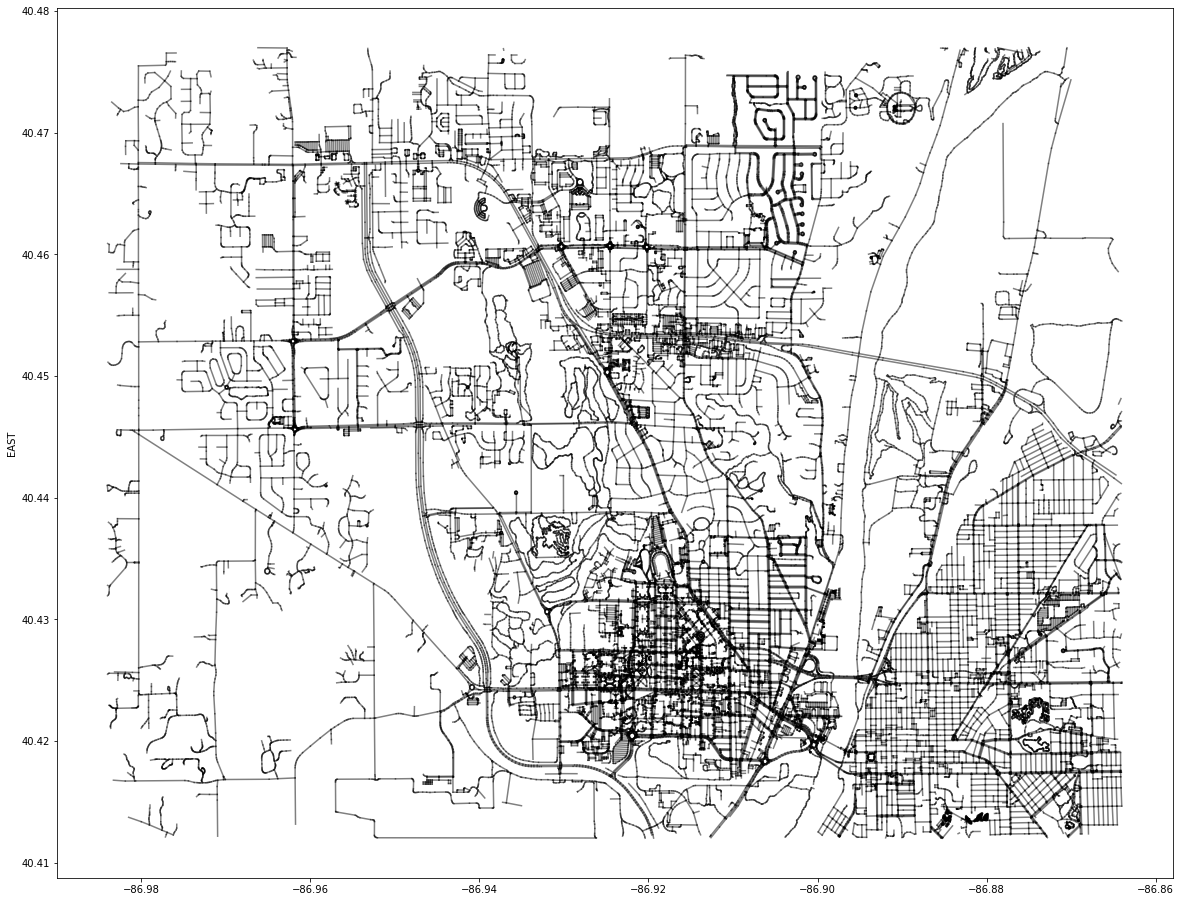

In [21]:
plt.figure(figsize=(20,16))
for i in range(len(n1)):
    plt.plot([n1[i], n2[i]], [e1[i], e2[i]], 'black' , alpha=0.5) # draw all nodes

plt.ylabel('EAST')
plt.show()


## restaurant example

In [8]:
p = input()
restaurtant = poi[['osm_id', 'amenity', 'name', 'way']]
p = restaurtant[restaurtant['amenity'] == p].reset_index(drop=True)

lat = []
lon = []
for i in range(len(p)):
    lat.append(np.float64(p.way[i][7:-1].split(' ')[0]))
    lon.append(np.float64(p.way[i][7:-1].split(' ')[1]))

p['lat'] = lat
p['lon'] = lon
p.head()

restaurant


,osm_id,amenity,name,way,lat,lon
0,4412612599,restaurant,Parkside Seafood House,POINT (-86.8719733 40.4158218),-86.871973,40.415822
1,9776704352,restaurant,Dos Amigos Mexican Restaurant,POINT (-86.8991776 40.4235634),-86.899178,40.423563
2,9525991459,restaurant,Insomnia Cookies,POINT (-86.9130139 40.431565),-86.913014,40.431565
3,9525991453,restaurant,Yummy Time,POINT (-86.9136865 40.4315026),-86.913686,40.431503
4,4747904128,restaurant,Yori,POINT (-86.9294398 40.4254664),-86.929440,40.425466


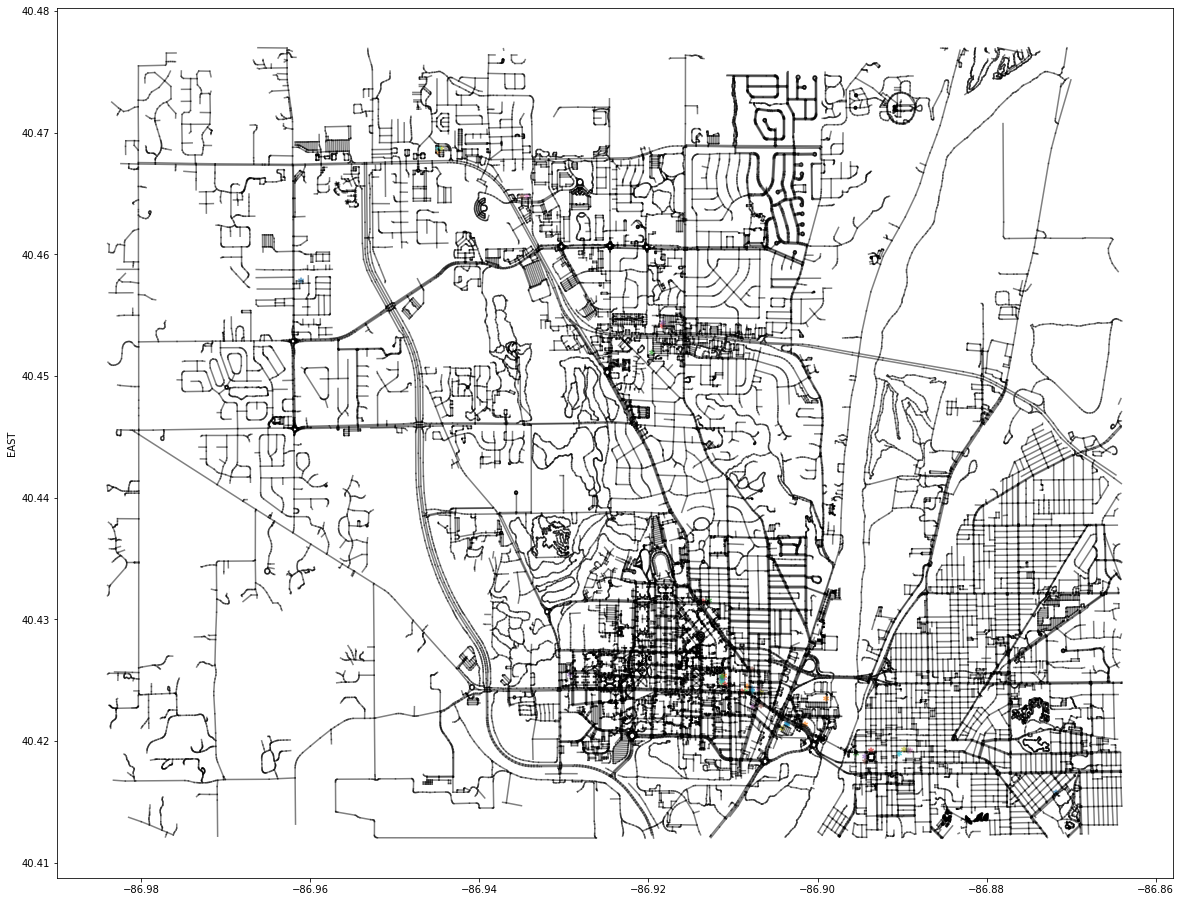

In [24]:
plt.figure(figsize=(20,16))

for i in range(len(n1)):
    plt.plot([n1[i], n2[i]], [e1[i], e2[i]], 'black' , alpha=0.5)# draw all nodes

plt.ylabel('EAST')

for i in range(len(p)):
    plt.scatter(p.lat[i], p.lon[i], marker=r'$\ast$' , alpha=0.5)
    
plt.show()

In [9]:
from rtree import index
from shapely.geometry import LineString
 
idx = index.Index()
df = edges

for i in range(len(df)):
    line_str = df.loc[i]['geom']
    line_pts = [[float(pt.strip().split()[0]), float(pt.strip().split()[1])] for pt in line_str[12:-1].split(',')]
    line_shp = LineString(line_pts)
    
    idx.insert(i, line_shp.bounds)

In [10]:
# starting node is point close to wabash landing
starting_node = [-86.900328, 40.422088]

#hits = idx.nearest((starting_node[0], starting_node[1], starting_node[0], starting_node[1]), 1)
#hits = list(hits)

## KNN 

In [11]:
idx2 = index.Index()
k = input('find k closest restaurant: ')
k = int(k)

# insert starting point
idx2.insert(0, (starting_node[0],starting_node[1],starting_node[0],starting_node[1]))

for i in range(len(p)):
    x, y = np.float64(p.way[i][7:-1].split(' ')[0]), np.float64(p.way[i][7:-1].split(' ')[1])
    
    idx2.insert(i, (x, y, x, y))

poi_place = idx2.nearest((starting_node[0], starting_node[1], starting_node[0], starting_node[1]), k)

poi_place = p.loc[list(poi_place)].reset_index(drop=True)

find k closest restaurant: 5


In [12]:
poi_place

,osm_id,amenity,name,way,lat,lon
0,4412612599,restaurant,Parkside Seafood House,POINT (-86.8719733 40.4158218),-86.871973,40.415822
1,6504317427,restaurant,Dusk Till Dawn Fried Chicken & Seafood,POINT (-86.9015781 40.4213872),-86.901578,40.421387
2,9776704352,restaurant,Dos Amigos Mexican Restaurant,POINT (-86.8991776 40.4235634),-86.899178,40.423563
3,8648179267,restaurant,Happy China,POINT (-86.9036772 40.4214361),-86.903677,40.421436
4,8648179268,restaurant,O-ishi,POINT (-86.9037257 40.4214562),-86.903726,40.421456


In [39]:
poi_place

,osm_id,amenity,name,way,lat,lon
0,4412612599,restaurant,Parkside Seafood House,POINT (-86.8719733 40.4158218),-86.871973,40.415822
1,6504317427,restaurant,Dusk Till Dawn Fried Chicken & Seafood,POINT (-86.9015781 40.4213872),-86.901578,40.421387
2,9776704352,restaurant,Dos Amigos Mexican Restaurant,POINT (-86.8991776 40.4235634),-86.899178,40.423563
3,8648179267,restaurant,Happy China,POINT (-86.9036772 40.4214361),-86.903677,40.421436
4,8648179268,restaurant,O-ishi,POINT (-86.9037257 40.4214562),-86.903726,40.421456


In [44]:
query = input()
query = query.split(' ')
k, amenity, start_point = int(query[1]), query[3], query[5]

start_point = start_point[1:-1].split(',')
start_point = [float(x) for x in start_point]

poi_table = poi[['osm_id', 'amenity', 'name', 'way']]
p = poi_table[poi_table['amenity'] == amenity].reset_index(drop=True)

lat = []
lon = []
for i in range(len(p)):
    lat.append(np.float64(p.way[i][7:-1].split(' ')[0]))
    lon.append(np.float64(p.way[i][7:-1].split(' ')[1]))

#p['lat'] = lat
#p['lon'] = lon

idx2 = index.Index()

# insert starting point
idx2.insert(0, (start_point[0],start_point[1],start_point[0],start_point[1]))

for i in range(len(p)):
    x, y = np.float64(p.way[i][7:-1].split(' ')[0]), np.float64(p.way[i][7:-1].split(' ')[1])
    
    idx2.insert(i, (x, y, x, y))

poi_place = idx2.nearest((start_point[0], start_point[1], start_point[0], start_point[1]), k)

poi_place = p.loc[list(poi_place)].reset_index(drop=True)

(poi_place)

find 5 nearest restaurant from [-86.900328,40.422088]


,osm_id,amenity,name,way
0,4412612599,restaurant,Parkside Seafood House,POINT (-86.8719733 40.4158218)
1,6504317427,restaurant,Dusk Till Dawn Fried Chicken & Seafood,POINT (-86.9015781 40.4213872)
2,9776704352,restaurant,Dos Amigos Mexican Restaurant,POINT (-86.8991776 40.4235634)
3,8648179267,restaurant,Happy China,POINT (-86.9036772 40.4214361)
4,8648179268,restaurant,O-ishi,POINT (-86.9037257 40.4214562)


In [275]:
poi_n = list(poi_place.lat)
poi_e = list(poi_place.lon)

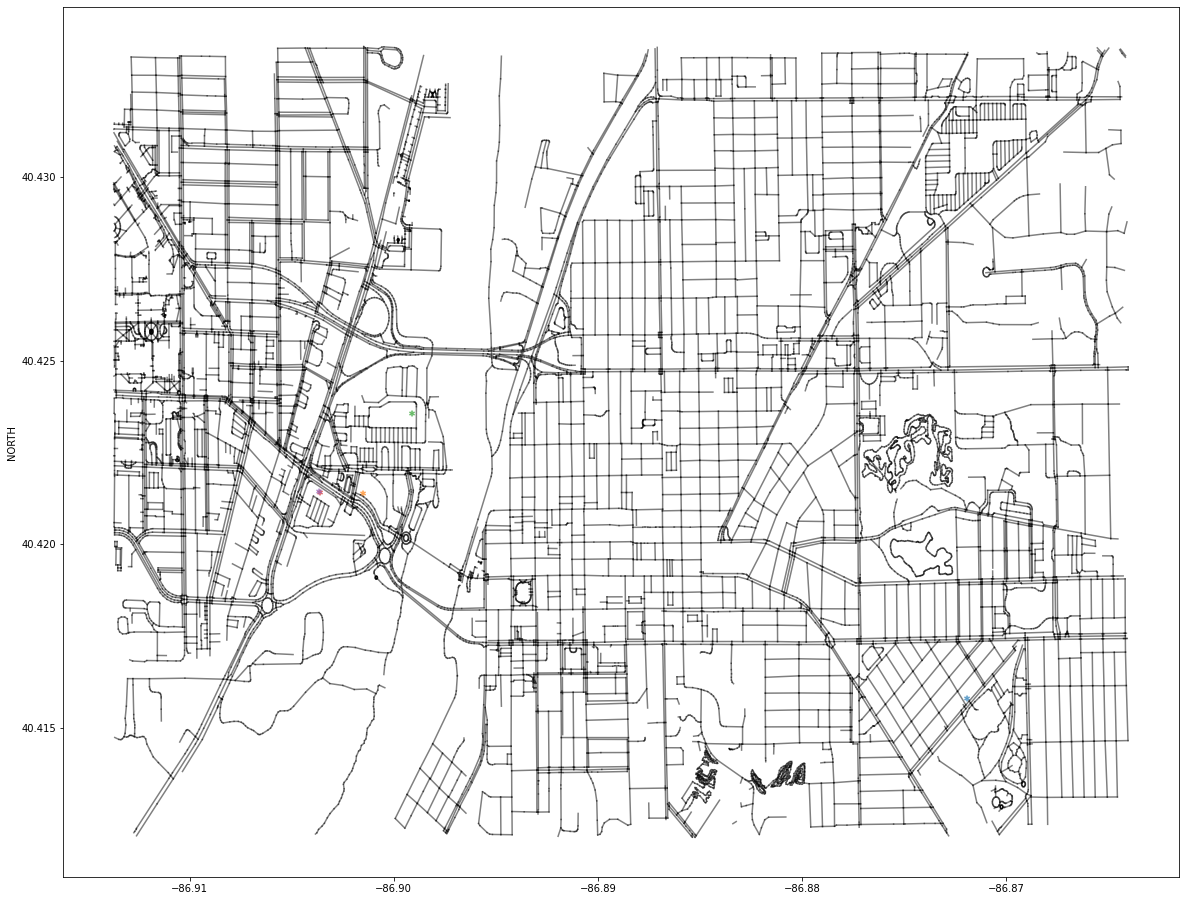

In [293]:
plt.figure(figsize=(20,16))
bound_n = [min(poi_n) - 0.01, max(poi_n) + 0.01]
bound_e = [min(poi_e) - 0.01, max(poi_e) + 0.01]


for i in range(len(n1)):
    
    max_n, min_n = max(n1[i], n2[i]), min(n1[i], n2[i])
    max_e, min_e = max(e1[i], e2[i]), min(e1[i], e2[i])
    
    if min_n > bound_n[0] and max_n < bound_n[1]:
        if min_e > bound_e[0] and max_e < bound_e[1]:
            plt.plot([n1[i], n2[i]], [e1[i], e2[i]], 'black' , alpha=0.5)# draw all nodes
            

plt.ylabel('EAST')
plt.ylabel('NORTH')

for i in range(len(poi_place)):
    plt.scatter(poi_place.lat[i], poi_place.lon[i], marker=r'$\ast$' , alpha=0.5)
    
plt.show()


## Range Query

In [78]:
# find the node closest to starting node

def closest_node(start_node, edge_data, edge_rtree):
    
    closest_edge_idx = edge_rtree.nearest((start_node[0], start_node[1], start_node[0], start_node[1]), 1)
    closest_edge_idx = list(closest_edge_idx)
    
    min_dis = np.inf
    closest_node = None
    for i in closest_edge_idx:
        line_str = edge_data.loc[i]['geom']
        line_pts = [[float(pt.strip().split()[0]), float(pt.strip().split()[1])] for pt in line_str[12:-1].split(',')]

        for x,y in line_pts:

            dk = [radians(_) for _ in [x, y]]
            dv = [radians(_) for _ in start_node]

            distance = ((haversine_distances([dk, dv])* 6371000/1600)[0, 1])

            if distance < min_dis:
                closest_node = [x, y]
    
    return closest_node

closest_start_node = closest_node(starting_node, df, idx)

In [79]:
p = input()
restaurtant = poi[['osm_id', 'amenity', 'name', 'way']]
p = restaurtant[restaurtant['amenity'] == p].reset_index(drop=True)

lat = []
lon = []
for i in range(len(p)):
    lat.append(np.float64(p.way[i][7:-1].split(' ')[0]))
    lon.append(np.float64(p.way[i][7:-1].split(' ')[1]))

p['lat'] = lat
p['lon'] = lon
p.head()

restaurant


,osm_id,amenity,name,way,lat,lon
0,4412612599,restaurant,Parkside Seafood House,POINT (-86.8719733 40.4158218),-86.871973,40.415822
1,9776704352,restaurant,Dos Amigos Mexican Restaurant,POINT (-86.8991776 40.4235634),-86.899178,40.423563
2,9525991459,restaurant,Insomnia Cookies,POINT (-86.9130139 40.431565),-86.913014,40.431565
3,9525991453,restaurant,Yummy Time,POINT (-86.9136865 40.4315026),-86.913686,40.431503
4,4747904128,restaurant,Yori,POINT (-86.9294398 40.4254664),-86.929440,40.425466


In [112]:
k = input('find restaurant within: ')
k = int(k)

wanted_restaurant = []

for i in range(len(p)):
    res_cor = list(p.iloc[i, :][['lat', 'lon']])
    res_node = closest_node(res_cor, df, idx)
    path = nx.shortest_path(G, str(closest_start_node), str(res_node), weight="weight")
    path_length = nx.shortest_path_length(G, str(closest_start_node), str(res_node), weight="weight")
    
    if path_length < k:
        wanted_restaurant.append(p.iloc[i, :]['name'])

find restaurant within: 2


In [113]:
wanted_restaurant

['Dos Amigos Mexican Restaurant',
 'Insomnia Cookies',
 'Yummy Time',
 'HotBox Pizza',
 'Noodles & I',
 'Maru Sushi',
 'Noodles & Company',
 'Greyhouse Coffee',
 'Khana Khazana',
 'Blue Nile',
 'Lotsa Pizza',
 'Mad Mushroom Pizza',
 'Main Street Poke',
 'Pizza and Parm',
 'Latin Inspired',
 'Sushi Boss',
 'Aatish',
 'Chef Bill Kim',
 'Sol Torro',
 'Fresh Fare',
 'BBQ District',
 "Walk On's Sports Bistreaux",
 'Blaze Chinese BBQ',
 'Yatagarasu',
 "Hala's Grill",
 'Basil Thai',
 'DAKSHIN',
 'Happy China',
 'O-ishi',
 'Dusk Till Dawn Fried Chicken & Seafood',
 'BRU Burger Bar',
 'La Scala',
 'Chumlies',
 "Merlin's Beard",
 "Professor Joe's Sports Bar & Pizzeria",
 "DT Kirby's",
 'Lafayette Brewing Co.',
 "Pete's Diner",
 'Heisei',
 'Katana Sushi & Ramen',
 "Lin's Wok"]